In [18]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt #导入输出结果可视化模块

In [19]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs #返回输出

In [20]:
# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]  #[-1,1]之间300组数据
noise = np.random.normal(0, 0.05, x_data.shape) #加入噪点，与x_data的格式相同
y_data = np.square(x_data) - 0.5 + noise

In [21]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)
# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [22]:
sess = tf.Session()
# tf.initialize_all_variables() no long valid from
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)


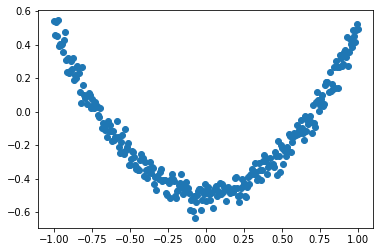

In [23]:
# plot the real data
fig = plt.figure() #生成一个图片框
ax = fig.add_subplot(1,1,1) #连续性的画图用ax
ax.scatter(x_data, y_data) #显示真实数据
plt.ion()  #让整个程序在显示图片之后不暂停
plt.show() #打印输出


In [24]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0]) #先抹除上一条线，再绘制下一次优化曲线
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data}) #喂入输入，预测输出
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5) #每50步显示一次预测数据，以点的方式，线的颜色为红色，宽度为5
        plt.pause(1) #暂停1s之后再绘图
